<a href="https://colab.research.google.com/github/kts-desilva/pythonII/blob/master/sec_numpy/numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Section 1: Introduction හැඳින්වීම

To use the numpy library, we need to import it into python environment. 

Numpy library පහත පරිදි import කරගනිමු.

In Google colab, its already available so to import the numpy library use import statement. 

Goodgle Colab හි එය දැන්ටමත් අන්තර්ගත හෙයින් import නැමැති සරල විධානය භාවිතයෙන් ඔබට පහසුවෙන් එය import කර ගැනීමට හැකියාව ඇත.

We can rename the imported library to a shorter name for our convenience.

පසු භාවිතය සඳහා පහසු වෙන පරිදි අපි එය සරල නාමයකින්  හඳුන්වා ගනිමු.



In [ ]:
import numpy as np

## Why use numpy?

*   Numpy arrays are faster and efficient than python arrays
*   Numpy has built in functions useful for faster calculations
*   Many libraries use numpy arrays to improve the performance

ඇයි Numpy library?

*   Numpy array, python lists ට වඩා ඉතා වේගවත් සහ කාර්යක්ශම වේ.
*   Numpy හි වේගවත් ගණනය කිරීම් සඳහා යොදා යොදාගැනීමට හැකියි යෙදුම් බහුලව ඇත.
*   වෙනත් library හි කාර්යක්ෂමතාව ඉහළ නැංවීම සඳහා Numpy භාවිතා කරනු ලැබේ.  


## Numpy applications

*   Mathematics (MATLAB replacement)
*   Plotting (Matplotlib)
*   Data processing (Pandas, Digital photography, Conenct 4)
*   Machine learning

## Numpy  යෙදුම්

*   ගණිතමය ගණනය කිරීම්
*   ප්‍රස්තාර ඇඳීම
*   දත්ත සැකසීම්
*   යාන්ත්‍රික ඉගෙනීම්

#Section 2: Creating numpy Array නිර්මාණය කිරීම

First we can go through some basic operations with numpy library. In numpy, we work with arrays. In python, you use lists. They looks the same, but internally the implementation is very different.

පලමුවෙන් අපි නම් Numpy library හි මූලික මෙහෙයුම් ඉගෙන ගනිමු. 

Numpy හි arrays යොදා ගනිමු. Python හි lists යොදා ගනිමු. මෙම දත්ත ව්‍යුහයන් සමාන ලෙස පෙනුනාද ඒවාගේ අභ්‍යන්තර ක්‍රියාත්මක කිරීම බෙහෙවින්ම වෙනස් වේ. 

## Create an array  නිර්මාණය කිරීම
The simplest way to create a numpy array is to type the values on the python script, however this is rarely used in practice.

පහතසුවෙන්ම Numoy array නිර්මාණය කිරීම්ට  Python script හි අගයන් ලබා දීම කළ සිදු කළ හැකිය. නමුත් එය එම ආකාරය භාවිත වන්නේ ඉතා කලාතුරකිනි.



In [ ]:
my_NP_array = np.array([1, 2, 3, 4, 5, 6])
print(my_NP_array)

[1 2 3 4 5 6]


## Other ways to create numpy arrays නිර්මාණය කිරීම සඳහා වෙනත් ආකාර
You can use already established python list and convert it to a numpy array.

ඔබට Python හි හදුන්වාදෙන ලද list එකක් වුවද Numpy Array එකකට පරිවර්තනය කර ගත හැකිය.


In [ ]:
python_list = [1,2,3,4,5,6,7,8,9,10]
converted_NP_array = np.array(python_list)
print(converted_NP_array)

[ 1  2  3  4  5  6  7  8  9 10]


#Section 2: Anatomy of an Array ව්‍යුහ විද්‍යාව 

## Numpy dimensions and shape හැඩය සහ මානය

Let’s assume that we have a large data set and counting the number of entries would be an impossible task. Assume it as a ordinary level exam results sheet with all 9 subecjts and 500,000 students. Here the dimension would be a student record and the elements would be the marks obtained for each subejct. We could use the shape attribute to find the number of elements along each dimension of this array. 

අප සතුව ඉතා විශාල දත්ත සමුදායක් ඇතැයි උපකල්පනය කරමු. එහි දත්ත ප්‍රමාණය ගණනය කිරීම් සුළුපටු කාර්යයක් නොවේ. උදාහරණයක් ලෙස අපොස සාමාන්‍ය පෙළ විභාග ප්‍රතිඵල සිතන්න. එහි සිසුන් ලක්ෂ 5කට ආසන්න ප්‍රමාණයකගේ විෂයන් නමයක විභාග ප්‍රතිඵල සඳහන් වනු ඇත.  මෙම දත්ත සමුදාය මානය එක් සිසුවෙකුගේ විභාග ප්‍රතිඵලය වන අතර එම මානයෙහි එක් කොටසක් ලෙස එක් විෂයකට ඒ සිසුවා ලබා ගත් ලකුණු ප්‍රමාණය සඳහන් කළ හැක. අප හට දත්ත සමුදායක හැඩය මගින් එක් මානයක තිබෙන කොටස් ගණන ගණනය කිරිම කිරීම්ට හැකියාව ඇත.


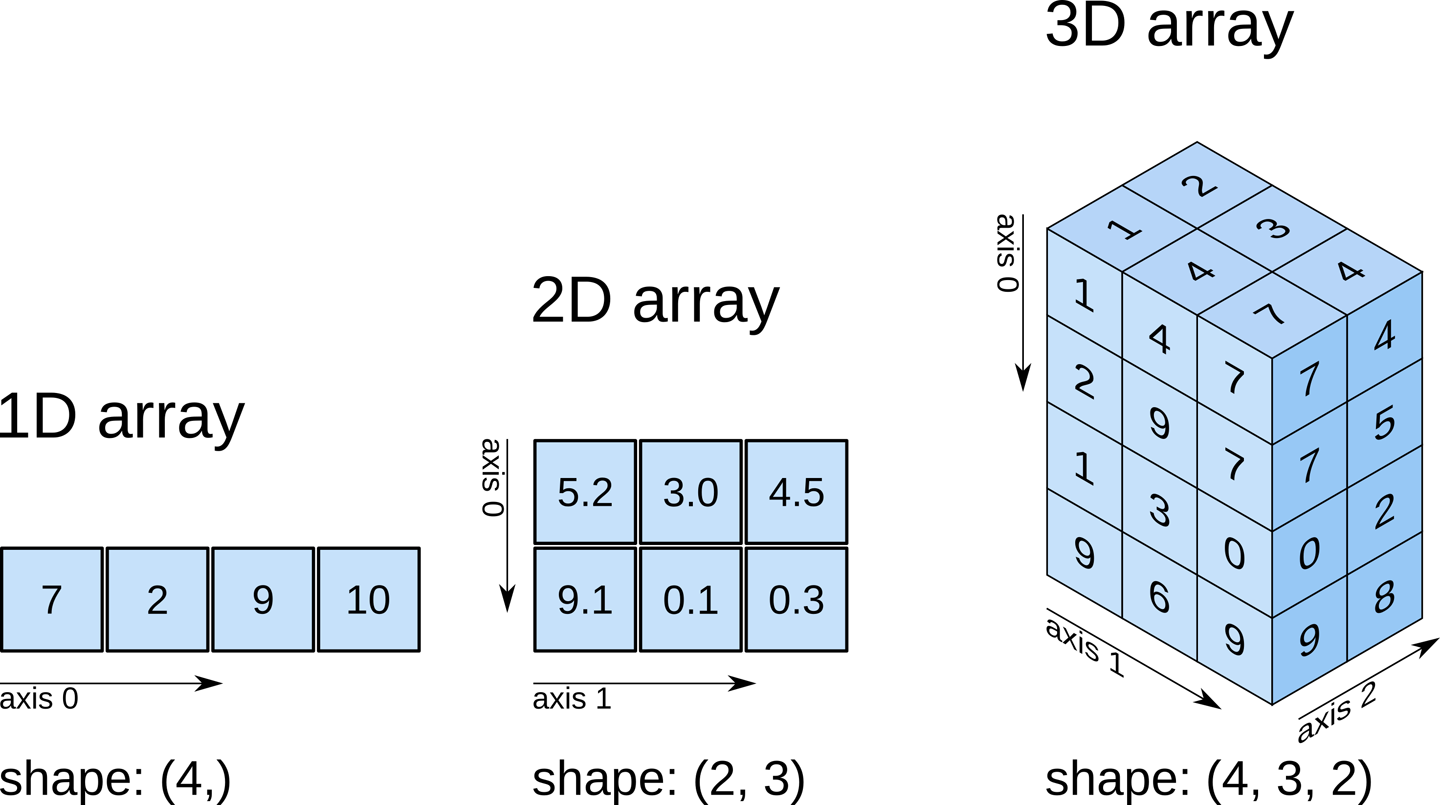

Numpy offers a powerful operation of reshape. By reshaping we can add or remove dimensions or change number of elements in each dimension. This makes numpy arrays more felxible.

Numpy වෙතින් reshape නම් ඉතා වැදගත් යෙදුම ඉදිරිපත් කරයි. Reshape යෙදුම් මගින් නම් Numpy Array එකක හැඩය වෙනස් කිරීම් හෝ අන්තර්ගතය ප්‍රමාණය වෙනස් කිරීම් සිදු කළ හැකිය. මෙම යෙදුම් මගින් නම් Numpy Array වඩා නම්‍යශීලී ඒවා බවට පත් කරයි.

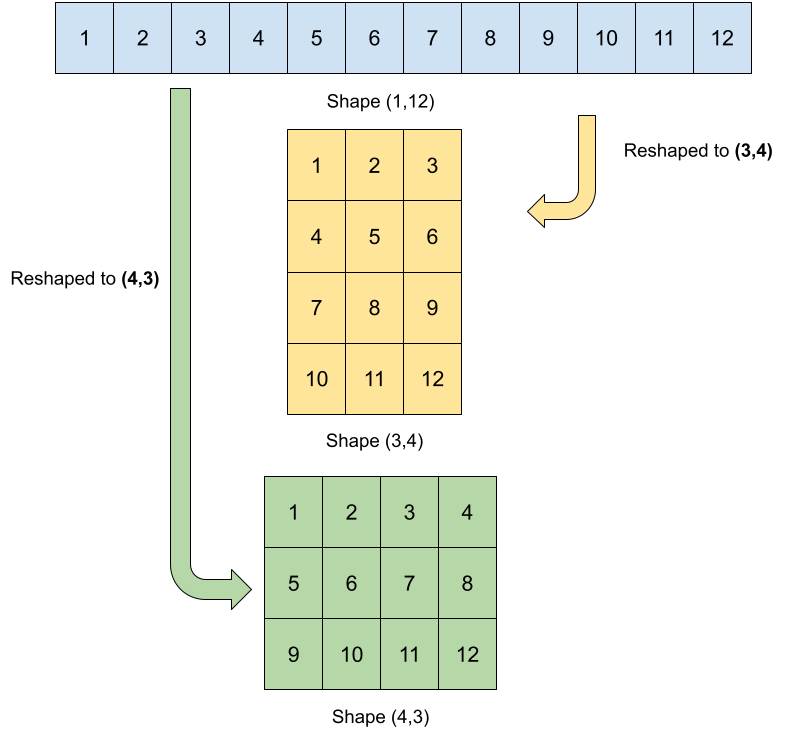

In Numpy, dimension and shape are related and sometimes similar concepts.

Numpy හි හැඩයන් සහ මානයන් බොහෝවිට සමාන  සංකල්ප ලෙස හඳුන්වා දිය හැක.

In [ ]:
array_1 = np.array([1,2,3])
array_2 = np.array([[1,2,3],[4,5,6]])

Let's look at the graphical representation of these arrays.

අපි array එකක රූපමය ස්වරූපය දෙස බලමු.

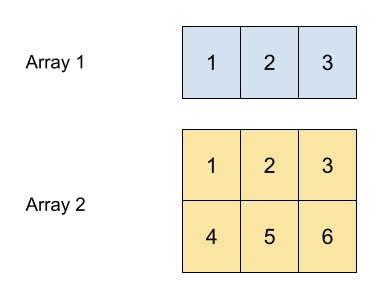

Now let's check the dimension of these arrays.
Dimension can be defined as the number of axes in array.

අපි පහත සඳහන් Arrays හි මානයන් දෙස බැලූ කල මානයක් යනු array එකක ඇති අක්ෂයක් ලෙස හැඳින්විය හැකිය.

In [ ]:
print('Dimension of array 1 is ', array_1.ndim)
print('Dimension of array 2 is ', array_2.ndim)

Dimension of array 1 is  1
Dimension of array 2 is  2


Now let's check the shape of the above arrays. Shape describes how many data (or the range) along each available axis.

අපි දැන් ඉහත Arrys හි හැඩයන් දෙස සලකා බලමු. එහි හැඩයක් යනු  එහි එක් එක් අක්ෂයක් මත පවතින දත්ත ප්‍රමාණය හෝ දත්ත පරාසයයි.

In [ ]:
print('Shape of array 1 is ', array_1.shape)
print('Shape of array 2 is ', array_2.shape)

Shape of array 1 is  (3,)
Shape of array 2 is  (2, 3)


When we need the number of elements of an array we can check its size.
Size equals to the product of the shape of the array.

Array එකක ප්‍රමාණය තීරණය කිරීම සඳහා අපි එහි Size නම් ගුණාංගය සලකා බලමු.  Size යනු array එකක හැඩයේ ට පවතින අගයන්හි ගුණිතයවේ.

In [ ]:
print('Size of array 1 is ', array_1.size)
print('Size of array 2 is ', array_2.size)

Size of array 1 is  3
Size of array 2 is  6


Sometimes the data that we collect will be messy and before we start analyzing it, we need to tidy it up.
We can change the shape of the array but the data and dimension remain the same.

සමහර අවස්ථාවන් වලදී අප එකතු කර කර ගන්නා වූ දත්ත අවුල් සහගතය ඒවා විය හැකිය. එවැනි අවස්ථාවලදී අප හට ඒවා පිළිවෙළකට සකස් කර ගැනීම අත්‍යවශ්‍ය වේග ඒ සඳහා අප හට හැඩය වෙනස් කර ගැනීමට අවශ්‍ය වන අතර Array හි මානය නියතව තබා ගනිමින් එය සිදු කළ හැකිය.

When we reshape an array we should match the array size as a factor of the new shape defined.

අපි array එකක් Reshape කරනා විට එහි ප්‍රමාණය නියතව තබා ගනිමින් Shape හි ගුණාකාර ලෙස පවත්වා ගත යුතුය.

In [ ]:
array_3 = array_2.reshape(3, 2)

print('array 3 is changed to ', array_3)
print('Shape of array 3 is ', array_3.shape)
print('Dimension of array 3 is ', array_3.ndim)

array 3 is changed to  [[1 2]
 [3 4]
 [5 6]]
Shape of array 3 is  (3, 2)
Dimension of array 3 is  2


**Can We Reshape Into any Shape?** 

**Array එකක් ඕනෑම හැඩයකට වෙනස් කර ගත හැකිද?**

Yes, as long as the elements required for reshaping are equal in both shapes.

ඔව්, හැඩය වෙනස් කිරීමට භාවිතා කරන අගයන් වල් ගුණිතය සහ දැනට පවතින අගයන් වල ගුණිතය සමාන නම් පමණි.

We cannot reshape array 2 as follows because the product of the reshape values should be equal to the array size.

අපිට පහත දැක්වෙන පරිදි array හි හැඩය වෙනස් කිරීමට නොහැකියග හේතුව වනුයේ අලුතින් හැඩය වෙනස් කිරීම්ට භාවිතා කරන අගයෙහි ගුණිතය දැනට එහි පවතින හැඩයේ පවතින ගුණිතයට අසමාන වන බැවිනි.

In [ ]:
array_4 = array_2.reshape(3, 4)

ValueError: ignored

Let’s say we are collecting data from a school indoor track sports meets for the 200-meter for women. During the first meet, we record three best times 23.09 seconds, 23.41 seconds, 24.01 seconds. During the second meet, we record three best times 22.55 seconds, 23.05 seconds and 23.09 seconds. We record this in a two-dimensional array. But once we begin analyzing the data we need the results to be in a single row. We do the following to reshape the matrix.

උදාහරණ ලෙස පාසල් මලල ක්‍රීඩා උත්සවයයකදී 200m ධාවන තරගයක් ක්‍රීඩා අවස්ථාවක් සලකමු. පළවෙනි වටයේදී උපරිම දක්ෂතා ලෙස තත්පර 23.09, තත්පර 23.41, තත්පර 24.01, තත්පර 23.05 සඳහන් කරන අතර දෙවැනි වටයේ දී උපරිම දක්ෂතා ලෙස තත්පර 22.55, තත්පර 23.05, තත්පර 23.09 සඳහන් කර ගනී. අපි දැන් මෙය මාලර දෙකක් සහිත array ඒකක ඉදිරිපත් කර ගනියි. නමුත් අපි මේ දත්ත අධ්‍යයනය කිරීමේ පහසු ව සඳහා තනි පේලියක තබා ගැනීම අත්‍යවශ්‍ය වේ. එම නිසා අපි මෙම array එක reshape කරගනිමු.

In [ ]:
track_array = np.array([[23.09, 23.41, 24.01], [22.55, 23.05, 23.09]])
print("Track array is\n", track_array)

track_array_new = np.reshape(track_array, (6,))
print("New track array is ", track_array_new)

Track array is
 [[23.09 23.41 24.01]
 [22.55 23.05 23.09]]
New track array is  [23.09 23.41 24.01 22.55 23.05 23.09]


However, if we have thousands of entries, this can be tricky. In this case, we can use -1 for one dimension and if possible the data will be reshaped for us.

කෙසේ නමුත් අප සතුව ස දහස් ගණනක් ඇති නම් මෙම ක්‍රියාවලිය බෙහෙවින්ම අපහසු වේ.  එම නිසා අපි එය එය පහසු කරගැනීම සඳහා -1 එක මානයක් ලෙස යොදා ගනිමින් array එක රීසෙට් කරගැනීමට හැකියාව  ඇත. මෙහිදී සිදුවන්නේ Numpy මගින් ස්වයංක්‍රීයව Array එක දෙන ලද මානයක් අනුව පමණක් reshape කරගැනීමයි.

In [ ]:
track_array_new2 = np.reshape(track_array, (-1,3))
print("New track array with (-1,3) reshaped is ", track_array_new2)

New track array with (-1,3) reshaped is  [[23.09 23.41 24.01]
 [22.55 23.05 23.09]]


In [ ]:
track_array_new3 = np.reshape(track_array, (3,-1))
print("New track array with (-1,3) reshaped is ", track_array_new3)

New track array with (-1,3) reshaped is  [[23.09 23.41]
 [24.01 22.55]
 [23.05 23.09]]


#Section 3: Evalutaing numpy performance කාර්යසාධනය ඇගයීම

Now we know how to create a numpy array. There are other methods to create numpy arrays, but we will work with these methods first. 

අපි Numpy හි array එකක් සාදා ගැනීමේ කෙසේදැයි  ඉගෙන ගත්තෙමු. Array සාදා ගැනීම සඳහා  මෙවැනි තවත් විධි විධාන ඇත. නමුත් අපි මේ ඉගෙන ගත් දෑ ඇසුරින් නිබන්ධනය පවත්වාගෙන යමු

To prove if numpy gives us a performance benifit, lets do a simple test with numpy. Lets assume we have a large dataset, and we want to multiply value by some number. This is useful in many applications, for example if you have an black and white (grayscale) image and you want to increase/decreas the brightness, we can read the pixel values of the image into numpy array and multiply the pixel values by a number to increase/decrease the pixel value. Since pixel values directly proportional to the bridgtness in a grayscale images we can change the brightness using a simple operation.

Numpy මගින් ඇත්ත වශයෙන්ම කාර්යසාධන සිදු විය හැකි දැයි පරීක්ෂණාත්මකව සොයා බලමු. අප සතුව ඉතා විශාල දත්ත සමුදායක් පවතී යැයි උපකල්පනය කරන්න. එහි ඇති සියලුම දත්ත යම් අගයකින් ගුණ කිරීමට අපට අවශ්‍යව ඇත. මෙම ක්‍රියාවලිය අපිට විවිධ අවස්ථාවලදී උපයෝගී වනු ඇත. උදාහරණයක් ලෙස කළු සුදු පින්තූරයක් යොදා ගෙන එහි දීප්තිය අඩු වැඩි කිරීම්ට අප හට එම පින්තූරය පික්සල් අගය එය යම්කිසි අගයකින් ගුණ කිරීමෙන් සමස්ත පින්තූරයෙහි ම දීප්තිය වෙනස් කරගැනීමට හැකියාව ඇත. මෙයට හේතු වනුයේ pixel හි අගය පින්තූරයෙහි දීප්තියට අනුලෝමව සමානුපාතික වන බැවිනි. 

If you have audio data, the loudness is proportianal to the audio sample values. You can increase the loudness by multiplyig the audio sample values by a factor.

අප සතුව ශබ්ද දත්ත සමුදායක් ඇති නම් එහි ඝෝෂාකාරී බව නියැදි අගයට අනුලෝමව සමානුපාතික වේ. අප හට ඝෝෂාකාරී බව වැඩිකර ගැනීමට නියැඳි අගයන් යම්කිසි අගයකින් ගුණ කර ගැනීමට හැකියාව ඇත.

If you want to do lot of these kind of processing, numpy can be a real benificial library. For example, if you want to process a large number of audio/image files.

අප හට මෙවැනි දත්ත සකස් කිරීම්ටත් නම් Numpy තාම ප්‍රයෝජනවත් වේ. උදාහරණයක් ලෙස විශාල ශ්‍රව්‍ය හෝ දෘශ්‍ය දත්ත සකස් කිරීමට නම් Numpy වැඩි වශයෙන් යොදා ගනු ලැබේ.

Lets do a simple test. Since reading audio, image require special functions out of our scope, lets create a simple array to fill our data and do the operation on this example array.

අපි සරල පරීක්ෂණයක් කරමු ඉතා විශාල ශ්‍රව්‍ය දෘශ්‍ය දත්ත පරිහරණය කිරීම අපහසු බැවින් අපි අපේ දත්ත සමුදාය ලෙස සරල array එකක් ලෙස නිර්මාණය කර ගනිමු. 

We can create an array with numpy and python and do a speed comparison.

අපි Numpy array එකක් නිර්මාණය කරගෙන එහි කාර්යක්ෂමතාවය/වේගවත් බව python list සමඟ සසඳා බලමු.



Lets create an array with 100 million elements.

අපි මිලියන 100 දත්ත සහිත array එකක් නිර්මාණය කර කර ගනිමු.

In [ ]:
import time #time library to measure execution time

#make two data storage variables for numpy and python 
python_list_100000000 = list(range(1,100000001))
print(len(python_list_100000000))

numpy_array_100000000 = np.arange(1,100000001)
print(len(numpy_array_100000000))

multiply_number = 3

#measure the time it takes to multiply each value

#we use time.time() to capture system time and measure the time difference to calculate elapsed time
t1 = time.time()
out1 = [multiply_number * x for x in python_list_100000000]
t2 = time.time()
time_diff_python = t2-t1
print(time_diff_python)

#now measure how much time it takes for numpy to do the same task
t1 = time.time()
out2 = numpy_array_100000000 * multiply_number
t2 = time.time()
time_diff_numpy = t2-t1
print(time_diff_numpy)

#Lets take the ratio between these two times
print("Numpy is {} times faster than a python list".format(time_diff_python/time_diff_numpy ))


100000000
100000000
11.231737613677979
0.19873476028442383
Numpy is 56.51622090470443 times faster than a python list


Now, since we have firsthand know numpy has a big performance advantage over standard python lists, we will learn more operations we can do with numpy.

මෙමගින් Numpy කාර්යසාධන හැකියාවක් සාමාන්‍ය python list වල්ට වඩා ඇති බව පසක් වේ. එලෙසම නම් Numpy මගින් අපිට ඉතා සංකීර්ණ ගණනය කිරීම් පවා ඉතා අඩු කාලයකින් කර ගැනීමට හැකියාව ඇත. තව දුරටත් ඒ ගැන ඉගෙන ගනිමු.

#Section 4: Loading, Reading, Writing Data  දත්ත විවෘත කිරීම, කියවීම සහ ලිවීම

## Loading a text file as numpy array 
## ලිපි ගොනු Numpy Array ලෙස විවෘත කිරීම

Lets assume we have two classes, 11 A and 11 B. At the end of the term test, we have final marks for a subject for both classes. There are 50 students in the class and the marks are stored in a CSV file.

උදාහරණයක් ලෙස අපි පාසලක 11A සහ 11B පන්ති දෙකක්  සලකමු.  වාර විභාග අවසානයේ දී සෑම විෂයකටම පන්ති දෙකෙහිම ලකුණු සටහන් කර කර ගනිමු. එක් පන්තියක ළමුන් සිසුන් 50ටක් ඇති බවත් ඔවුන්ගේ ලකුණු 100 csv වර්ගයේ ලිපි ගොනුවක සඳහන් කර ඇත.


In [ ]:
#These are the paths to data files of class list

class1_data_path = "https://raw.githubusercontent.com/GPrathap/pythonII/master/dataset/class_list/class1_marks.csv"
class2_data_path = "https://raw.githubusercontent.com/GPrathap/pythonII/master/dataset/class_list/class2_marks.csv"

## Read data
Numpy has the builtin feature to read data from a csv (or text) file. Lets use numpy loadtxt function to read the data as numpy arrays.

Numpy හි CSV හෝ ලිපිගොනු කියවීමේ හැකියාව ඇත. අපි Numpy හි loadtxt මෙහෙයුම යොදාගෙන දත්ත array වලට කියවා ගනිමු.

We want to make sure we load data as floating point numbers and we skip the first row because first row is dedicated to the column header.

අපේ දත්ත දශම සංඛ්‍යා ලෙස කියවා ගත් යුතු අතර අතර පළමු පෙළ දත්තවල ශීර්ෂ ලෙස සලකමු.

After reading, we can print the length of class data to make sure we have read all the available data points.

දත්ත සියල්ලම කියවා ගෙන අපි ඒවා පහත පරිදි පෙන්නුම් කරමු.

In [ ]:
#read an array from a file
class1_data = np.loadtxt(class1_data_path, dtype=float, skiprows=1)
class2_data = np.loadtxt(class2_data_path, dtype=float, skiprows=1)
print(len(class1_data))
print(len(class2_data))


print(max(class1_data))
print(max(class2_data))

50
50
100.0
99.0


#Section 5: Sorting, Slicing, Stacking and Logical Operations දත්ත වර්ග කිරීම් වෙන්කිරීම, එකතු කිරීම  සහ තාර්කික මෙහෙයුම්

## Sorting  දත්ත වර්ග කිරීම්
Lets see if we can sort the class 1 results. Numpy has sort() function to efficiently sort data.

අපි බලමු පළමු පන්තියේ විභාග ලකුණු පිළිවෙලකට සකස් කිරීම් හෝ වර්ග කිරීම්  කරන්නේ කෙසේද යන වග. එහිදී Numpy හී sort() මෙහෙයුම ඉතාම කාර්යක්ශම බව දත්ත වර්ග කිරීමට යොදා ගත හැකිය.


In [ ]:
sorted_class1 = np.sort(class1_data);
print(sorted_class1)


[  3.   8.  13.  14.  15.  18.  21.  22.  24.  27.  30.  33.  35.  37.
  39.  40.  40.  40.  40.  43.  44.  48.  50.  52.  56.  57.  58.  59.
  60.  60.  62.  63.  65.  72.  72.  73.  74.  79.  81.  82.  82.  82.
  83.  84.  91.  93.  94.  97.  98. 100.]


We can do the same for the class 2 results.

අපි දැන් දෙවැනි පන්තියේ සඳහාද එසේ දත්ත වර්ග කරමු.


In [ ]:
sorted_class2 = np.sort(class2_data);
print(sorted_class2)

[ 0.  0.  1.  3.  3.  4.  6.  7.  9. 13. 15. 16. 16. 19. 19. 21. 26. 29.
 30. 30. 32. 35. 36. 37. 37. 40. 40. 46. 48. 49. 55. 57. 58. 58. 59. 64.
 67. 71. 72. 74. 75. 76. 78. 84. 92. 95. 97. 98. 99. 99.]


## Logic operations තාර්කික මෙහෙයුම්
With this sorted array, we can do some interesting comparisons. Lets say our pass mark is 50. Can we find how many students have passed?

දත්ත වර්ග කිරීමෙන් අපිට වටිනා තොරතුරු ලබාගත හැකිය උදාහරණයක් ලෙස වාර විභාගය ලකුණු 50ට වැඩියෙන් ගත් සිසුන් සමත් ලෙස වර්ග කෙරේ එම සමත් වූ සිසු සංඛ්‍යාව සොයා ගන්නේ කෙසේද?

Numpy gives us an easy way to do the comparison. We can compare the full array against a number and numpy will give us an array containing true/false values for each and every element of the comparing array. 

Numpy ඉතාම පහසුවෙන් දත්ත සංසන්දනය කිරීමට හැකි හැකියාව ලබා දී ඇත. එමගින් අප හට Numpy හි සියලුම දත්ත යම්කිසි අගය සමඟ සංසන්දනය කර ප්‍රතිඵලය සෑම දත්තයක් සඳහාම ලබාගැනීමට හැකියාව ඇත.


In [ ]:
class1_passed = sorted_class1 >= 50 # this will give us an true false array
print(class1_passed)
class1_passed_sum = class1_passed.sum(); # find total pass students
class1_failed_sum = sorted_class1.size - class1_passed_sum
print("Passed: ",class1_passed_sum)
print("Failed: ",class1_failed_sum)


[False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
Passed:  28
Failed:  22


##Array slicing ඛණ්ඩනය කිරීම

Array slicing is similar to normal python list convention. You can use startindex:endindex convention.

Numpy Array ඛණ්ඩනය කිරීම කිරීම python හි List වල ඛණ්ඩනය කිරීමට සමාන වේ.මෙහිදී ආරම්භක සහ අවසාන දර්ශකයක් යොදාගෙන array ඛණ්ඩනය කිරීමේ හැකියා හැකියාව ඇත.

Let's say you want to display all failed students, you can achieve the same with a sorted array or non-sorted array.

උදාහරණයක් ලෙස සියලු අසමත් වූ සිසුන් ඉදිරිපත්කි කිරීමට නම් අපිට අප හට Array වර්ග කිරීම හෝ වර්ග නොකරන ලද Array භාවිතා කිරීමේ හැකියාව ඇත.

For sorted array, its easy because we just want to cut the class in two sections.

වර්ග කරන ලද Array භාවිතා කරන විට නම් ඉතාම පහසුවෙන් සමත් සහ අසමත් ලෙස Array  ඛණ්ඩනය කළ හැක.
 

In [ ]:
failed_class1_array = sorted_class1[0:class1_failed_sum]
print(failed_class1_array)

[ 3.  8. 13. 14. 15. 18. 21. 22. 24. 27. 30. 33. 35. 37. 39. 40. 40. 40.
 40. 43. 44. 48.]


The other way of finding out students satisfying a codition doesn't require a sorted array.

වෙනත් ආකාරයකින් සලකා බැලුව වර්ගීකරණය කරල ද Array භාවිතයෙන් තොරව වුවද සිසුන්ගේ ලකුණු වර්ගීකරණය කර ගත හැකිය.

For example, from the original unsorted array, lests find out students who scored 50 or more. We can do this by doing a comparison that will generate true/false values array.

උදාහරණයක් ලෙස අප සතු දත්ත සමුදාය ලකුණු 50ට වඩා වැඩියෙන් ගත් සිසුන් කවුදැයි හා හඳුනා ගැනීම් සලකමු. අප හට මෙය සංසන්දනාත්මක ආකාරයෙන් සකසා ගත් අලුත් array එකක් මගින් පෙන්නුම් කළ හැකියි.

In [ ]:
passed_indexes1 = class1_data>=50 # this will compare the condition elementwise and give us an array 
print(passed_indexes1)

[ True  True  True  True  True  True  True False  True  True False False
 False False False False False  True False  True  True  True False False
  True  True False False False  True  True False  True  True False  True
 False False  True  True  True False False False  True  True  True  True
 False  True]


Then, we can use this true/false index array to select the elements from the original array.

දැන් අපි සත්‍ය හා අසත්‍ය වශයෙන් දර්ශක භාවිතයෙන් Array හි අගයන් ලබාගත් හැකියි.

In [ ]:
print(class1_data) #original array
print(passed_indexes1)
print(class1_data[passed_indexes1])


[ 82.  98.  84.  97.  83.  72.  91.   3.  62.  60.  48.  35.  30.  40.
  15.  22.  40.  72.  13.  73.  60. 100.   8.  21.  65.  94.  44.  24.
  27.  63.  82.  33.  56.  81.  18.  79.  40.  14.  50.  82.  74.  40.
  43.  37.  59.  52.  93.  58.  39.  57.]
[ True  True  True  True  True  True  True False  True  True False False
 False False False False False  True False  True  True  True False False
  True  True False False False  True  True False  True  True False  True
 False False  True  True  True False False False  True  True  True  True
 False  True]
[ 82.  98.  84.  97.  83.  72.  91.  62.  60.  72.  73.  60. 100.  65.
  94.  63.  82.  56.  81.  79.  50.  82.  74.  59.  52.  93.  58.  57.]


As you can see above, the true, false array work as indexes and we can easily select elements satisfying a condition.

ඉහත දැක්වෙන පරිදි මේ සොයාගත් සත්‍ය අසත්‍ය දර්ශක ලෙස යොදාගගත හැකි අතර අප හට ඉතාමත් පහසුවෙන් යම්කිසි තත්වයක් සප්ථ කර වන අගයන් සොයා ගැනීමට හැකියාව ඇත.

This could be extended in many ways.

මෙය තවත් විවිධ ආකාරයට භාවිතා කළ හැකිය.


## Stacking Numpy Arrays - Array එකතු කිරීම

By default, np.stack() stacks/concatanate arrays along the 0th dimension (rows) (parameter axis=0).

Array එකතු කිරීම මානය 0 වෙන්න ආකාරයට සිදු කරනු ලබයි.

As an example, we can concatanate class 1 and class 2 data together to a single array with Numpy stack function.

උදාහරණයක් ලෙස පළමුවන පන්තිය සහ දෙවන පංතියේ ලකුණු එකතු කර අපිට අලුත් Array එකක් සාදා ගැනීමේ හැකි හැකියාව ඇත.

In [ ]:
all_class_data = np.stack((class1_data, class2_data))

print("All class data shape ", all_class_data.shape)
print(all_class_data)

All class data shape  (2, 50)
[[ 82.  98.  84.  97.  83.  72.  91.   3.  62.  60.  48.  35.  30.  40.
   15.  22.  40.  72.  13.  73.  60. 100.   8.  21.  65.  94.  44.  24.
   27.  63.  82.  33.  56.  81.  18.  79.  40.  14.  50.  82.  74.  40.
   43.  37.  59.  52.  93.  58.  39.  57.]
 [  0.  99.  98.  97.   3.  58.  40.  37.  48.   1.  40.  58.  13.  57.
   92.  19.  71.   3.   4.  78.   0.  36.  84.  15.  49.  75.   6.  37.
   99.  67.  19.  46.  59.  35.  30.  74.  55.  30.  95.  29.   7.  26.
   72.  16.   9.  76.  21.  32.  16.  64.]]


## Numpy logical operations - තාර්කික මෙහෙයුම්

In the next example, lets find out the students who scored more than 90. Instead of saving the true/false array, we can use the result in shorter format as bellow.

මීළඟ උදාහරණයෙන් අපි ලකුණු 90 ට වඩා ගත් සොයා බලමු. true/false ආකාරයට එරෙහි ගබඩා කිරීම්ට වඩා පහසුවෙන් අපිට බා ගත් ප්‍රතිඵල පහත ආකාරයේ ඉදිරිපත් කළ හැකිය

Also, we can use two conditions and use numpy logical operations to match the two scenarios. For example, we can check if students are above 45 and below 55 mark by combining two comparisons and do logical_and operation.

එලෙසම අප හට සාධකයන් දෙකක් අවස්ථා දෙකකට ගැලපීම් සඳහා නම් Numpy තාර්කික මෙහෙයුම් යොදාගගත හැකිය. 

උදාහරණයක් ලෙස ලකුණු 45 ත් 55 ත් අතර සිසුන් සොයා ගැනීමට  සංසන්දනාත්මක මැෂින් සහ තාර්කික AND ද්වාර යොදාගගත හැකිය.

In [ ]:
print(">90 students ",class1_data[class1_data > 90])#print students who got more than 90
print("45-55 students ",class1_data[np.logical_and((class1_data > 45),(class1_data < 55))])#print students marks between 45-55, take two arrays and take the logical and


>90 students  [ 98.  97.  91. 100.  94.  93.]
45-55 students  [48. 50. 52.]


## Simple scripts and more logical operations තවත් තාර්කික ද්වාර සහ උදාහරණ

Now lets write a quick loop to group students with different mark regions.

දැන් අපේ සිසුන් විවිධ ලකුණු මට්ටම් වල වර්ග කිරීම් සිදු කරමු.




In [ ]:
mark_cutoffs = [35,50,65,75,85,100] #these are our cutoff marks
tmp_class1_data = np.array(class1_data, copy=True)  
for cutoff in mark_cutoffs:
  indexes = tmp_class1_data>=cutoff
  above_cutoff = tmp_class1_data[indexes]
  below_cutoff = tmp_class1_data[np.logical_not(indexes)]
  print("<",cutoff," ",np.sort(below_cutoff)," sum = ",len(below_cutoff))
  tmp_class1_data = above_cutoff

< 35   [ 3.  8. 13. 14. 15. 18. 21. 22. 24. 27. 30. 33.]  sum =  12
< 50   [35. 37. 39. 40. 40. 40. 40. 43. 44. 48.]  sum =  10
< 65   [50. 52. 56. 57. 58. 59. 60. 60. 62. 63.]  sum =  10
< 75   [65. 72. 72. 73. 74.]  sum =  5
< 85   [79. 81. 82. 82. 82. 83. 84.]  sum =  7
< 100   [91. 93. 94. 97. 98.]  sum =  5


#Section 5: Handling corrupted or unavailable data හානි වූ සහ අස්ථානගත දත්ත  සකස් කිරීම

Lets say, class2 data is tentative for three student, we can mark these students as np.nan which is a way to tell numpy thate these are not a numbers. 

උදාහරණයක් ලෙස class2 හි දත්ත සිසුන් තුන්දෙනෙකුට වලංගු නොවේ යැයි උපකල්පනය කරමු, මෙහිදී මෙම සිසුන් තුන්දෙනාගේ ලකුණු np.nan ආකාරයට සකස් කිරීමෙන් Numpy විසින් මෙම සිසුන් තුන්දෙනා ගේ අගයන් ලකුණු නොවන බව හඳුනාගනී.

In [ ]:
class2_data[[5,8,20]] = np.nan #we are using multiple indexes to assign a value
#now 5th, 8th, and 20th student doesn't have valid numbers
print(class2_data)

[ 0. 99. 98. 97.  3. nan 40. 37. nan  1. 40. 58. 13. 57. 92. 19. 71.  3.
  4. 78. nan 36. 84. 15. 49. 75.  6. 37. 99. 67. 19. 46. 59. 35. 30. 74.
 55. 30. 95. 29.  7. 26. 72. 16.  9. 76. 21. 32. 16. 64.]


Now lets see what happen if we get the class average.

දැන් අපි පන්තියේ මධ්‍යනය ගණනය කරමු.


In [ ]:
np.average(class2_data) #the output is also a not-a-number because we try to do mathematical operations with nan

nan

## Numpy masks
To deal with this kind of situations, we can use numpy mask.

ඉහත සඳහන් පරිදි අවස්ථාවලදී අපිට Numpy masks මෙහෙයුම් යොදා ගත හැකිය.


In [ ]:
masked_class2 = np.ma.masked_invalid(class2_data)
print(class2_data)
print(masked_class2)
print(np.average(masked_class2)) #the size of the array doesn't change, but with masked arrays we can avoid invalid data causing problems

[ 0. 99. 98. 97.  3. nan 40. 37. nan  1. 40. 58. 13. 57. 92. 19. 71.  3.
  4. 78. nan 36. 84. 15. 49. 75.  6. 37. 99. 67. 19. 46. 59. 35. 30. 74.
 55. 30. 95. 29.  7. 26. 72. 16.  9. 76. 21. 32. 16. 64.]
[0.0 99.0 98.0 97.0 3.0 -- 40.0 37.0 -- 1.0 40.0 58.0 13.0 57.0 92.0 19.0
 71.0 3.0 4.0 78.0 -- 36.0 84.0 15.0 49.0 75.0 6.0 37.0 99.0 67.0 19.0
 46.0 59.0 35.0 30.0 74.0 55.0 30.0 95.0 29.0 7.0 26.0 72.0 16.0 9.0 76.0
 21.0 32.0 16.0 64.0]
44.4468085106383


In [ ]:
#we can get more details for masked array

print("masked array indexes ",np.flatnonzero(masked_class2.mask))

masked array indexes  [ 5  8 20]


This shows that we have non-zero values on the masked array at these points, indicating we have 3 nan values, and places.

මෙහිදී අපට පෙන්නුම් කරන්නේනු ලබන්නේ අප අලුතින් සාදාගත් masksed array හි බින්දුවට අසමාන අගයන් පවතින බවත් එම අගයන් පවතින ස්ථානයන්ය.